In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Lib.subdivision as sub
import Lib.embedded as emb

## Quick Start-Subdivision Method
#### Wellblock Mesh

<img align="left" src="images/Mesh-subdivision.png" alt="Drawing" style="width: 300px;"/>

```C++
        **Meshing information**
         Pts        SubGrid     Neighbor    Internal Edge    OutFlow Edge
         0          0(3,4,0)     (1,3)        0(3,4)            0(3,0)
         1          1(0,4,1)     (2,0)        1(4.0)            1(0,1)
         2          2(1,4.2)     (3,1)        2(1,4)            2(1,2)
         3          3(2,4,3)     (0,2)        3(2,4)            3(2,3)
         4
```
<br /><br /><br />
#### Example Steps
```python
#1. Initialize a Wellblock with subdivision method
    subdivision.WellGrid(Rect0=(0,0),Rect1=(50,50),Qw=1000,Qe=(200,400,300,100),h=26.25,phi=0.2)
"""
        Rect0  -- The coordinates of left bottom corner point of the rectangle
        Rect1  -- The coordinates of right top corner point of the rectangle
        Qw     -- Wellbore flow rate, stb/day
        Qe     -- Outflow edge flow rate, stb/day (Edge0,Edge1,Edge2,Edge3)
        h      -- Wellblock thickness
        phi    -- Wellblock porosity
"""
#2. Solve the internal mass balnaced equation
    subdivision.Subdivision()
#3. Tracing streamline and output streamline and TOF information
    SL,TOF,SL_end,TOF_end=subdivision.SLTrace(NSL=80)
"""
        NSL        -- Number of Streamline
        TOF        -- TOF array of of the [NSL] streamlines  
        SL         -- nodes array of of the [NSL] streamlines  
        TOF_end    -- a boundary TOF list of the [NSL] streamlines  
        SL_end     -- a boundary node list of the [NSL] streamlines 
"""
```
    

# Case 3 in SPE-182614-MS

## Subdivision Method

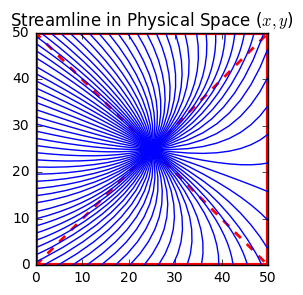

In [2]:
import Lib.subdivision as sub

Method_subdivision=sub.WellGrid(Rect0=(0,0),Rect1=(50,50),Qw=1000,Qe=(200,400,300,100),h=26.25,phi=0.2)
Method_subdivision.Subdivision()
SL,TOF,SL_end,TOF_end=Method_subdivision.SLTrace(NSL=80)

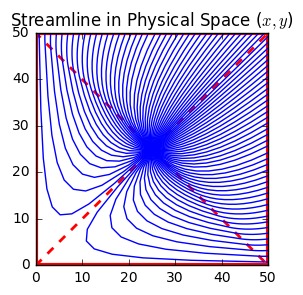

In [3]:
Method_subdivision=sub.WellGrid(Rect0=(0,0),Rect1=(50,50),Qw=1000,Qe=(0,0,500,500),h=26.25,phi=0.2)
Method_subdivision.Subdivision(debug=0)
SL,TOF,SL_end,TOF_end=Method_subdivision.SLTrace(NSL=80)

## Quick Start-Embedded Method
#### Wellblock Mesh

<img align="left" src="images/Mesh-embedded.png" alt="Drawing" style="width: 300px;"/>

```C++
        **Meshing information**
         Pts        Outflow Edge    Well    
         0          0(0,1)        0
         1          1(1,2)        1
         2          2(2,3)        ..
         3          3(3,0)
         ..         ..
         
```
<br /><br /><br />
#### Example Steps
```python
#1. Initialize a Wellblock with the embedded method
    embedded.WellGrid(Pts_e=Boundary_vert,Pts_w=Well_vert,Qe=Qedge,Qw=Qwell,Nbd=10,rw=0.25,h=26.25,phi=0.2,miu=1,kxy=(200,200))
"""
        Pts_e  -- Vertices of boundary edge e.g. [(0,0),(0,1),(1,1),(1,0)]
        Pts_w  -- Location of well e.g. [(0.5,0.5),(0.75,0.75)]
        Qw     -- Wellbore flow rate, stb/day e.g. [1000,200]
        Qe     -- Outflow edge flow rate, stb/day e.g. [400,300,300,200]
        h      -- Wellblock thickness
        phi    -- Wellblock porosity
        miu    -- Fluid viscosity
        kxy    -- Principle permeability of the wellblock. e.g. [kxx,kyy]    
"""
#2. Construct mesh for VBEM
    embedded.Meshing()
#3. Solve the velocity field for VBEM
    embedded.FlowSol()
#4. Tracing streamline and output streamline and TOF information
    SL,TOF,SL_end,TOF_end=embedded.SLtrace(NSL=80,deltaT=0.1,method='RK4')
"""
        NSL        -- Number of Streamline
        method      -- Numerical integration method. RK2, RK4 and Adapative are provided
        TOF        -- TOF array of of the [NSL] streamlines  
        SL         -- nodes array of of the [NSL] streamlines  
        TOF_end    -- a boundary TOF list of the [NSL] streamlines  
        SL_end     -- a boundary node list of the [NSL] streamlines 
"""
#6. Plotting and output the velocity field
    P,V_x,V_y=embedded.FieldPlot(vmax=50)
"""
        vmax     -- Maximum range of the color bar
        P        -- pressure array of the polygon domain  
        V_x      -- velocity in x direction of the polygon domain   
        V_y      -- velocity in y direction of the polygon domain  
"""
```
    

## Embedded Method

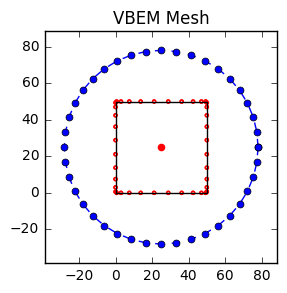

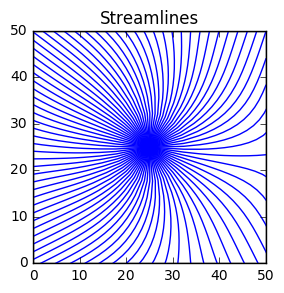

In [2]:
import Lib.embedded as emb

Boundary_vert=[(0, 0), (0, 50), (50, 50), (50, 0)]
Well_vert=[(25,25)]
Qwell=[1000]
Qedge=[400,300,100,200]
Method_embedded=emb.WellGrid(Pts_e=Boundary_vert,Pts_w=Well_vert,Qe=Qedge,Qw=Qwell,Nbd=10,rw=0.25,h=26.25,phi=0.2,miu=1,kxy=(200,200))
Method_embedded.Meshing()
Method_embedded.FlowSol()
SL,TOF,SL_end,TOF_end=Method_embedded.SLtrace(NSL=80,deltaT=0.1,method='Adaptive')

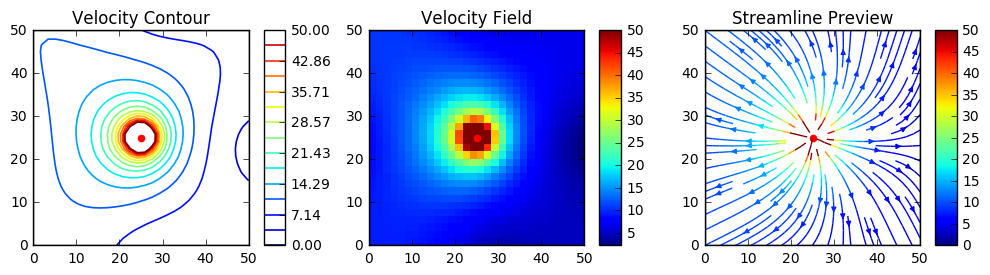

In [3]:
P,V_x,V_y=Method_embedded.FieldPlot(vmax=50)

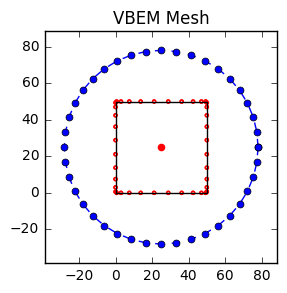

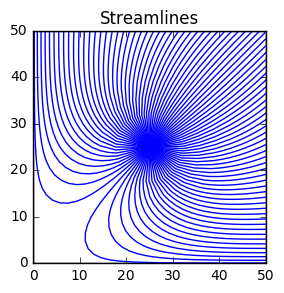

In [3]:
Boundary_vert=[(0, 0), (0, 50), (50, 50), (50, 0)]
Well_vert=[(25,25)]
Qwell=[1000]
Qedge=[0,500,500,0]
Method_embedded=emb.WellGrid(Pts_e=Boundary_vert,Pts_w=Well_vert,Qe=Qedge,Qw=Qwell,Nbd=10,rw=0.25,h=26.25,phi=0.2,miu=1,kxy=(200,200))
Method_embedded.Meshing()
Method_embedded.FlowSol()
SL,TOF,SL_end,TOF_end=Method_embedded.SLtrace(NSL=81,deltaT=0.1,method='Adaptive')

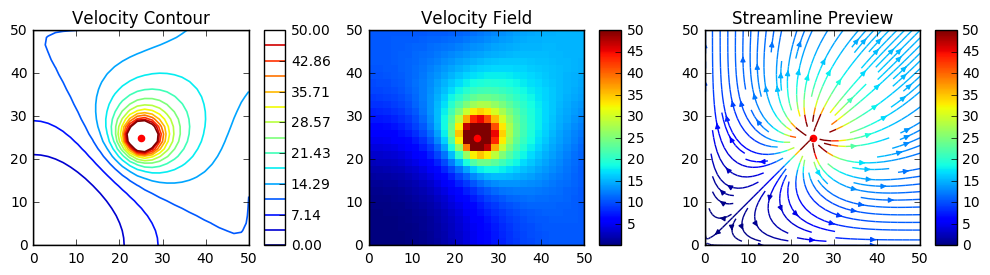

In [5]:
P,V_x,V_y=Method_embedded.FieldPlot(vmax=50)

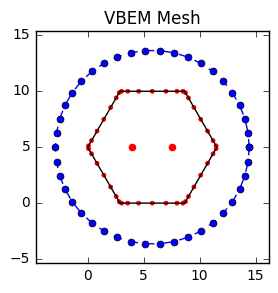

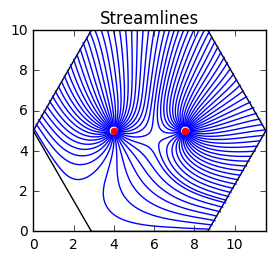

In [60]:
Boundary_vert=[(2.88675,0), (0,5), (2.88675,10), (8.66025,10),(11.54701,5),(8.66025,0)]
Well_vert=[(4,5),(7.547,5)]
Qwell=[500,500]
Qedge=[0,250,250,250,250,0]
Method_embedded=emb.WellGrid(Pts_e=Boundary_vert,Pts_w=Well_vert,Qe=Qedge,Qw=Qwell,Nbd=7,rw=0.25,h=26.25,phi=0.2,miu=1,kxy=(200,200))
Method_embedded.Meshing()
Method_embedded.FlowSol()
SL,TOF,SL_end,TOF_end=Method_embedded.SLtrace(NSL=82,deltaT=0.00005,method='Adaptive',tol=0.01)

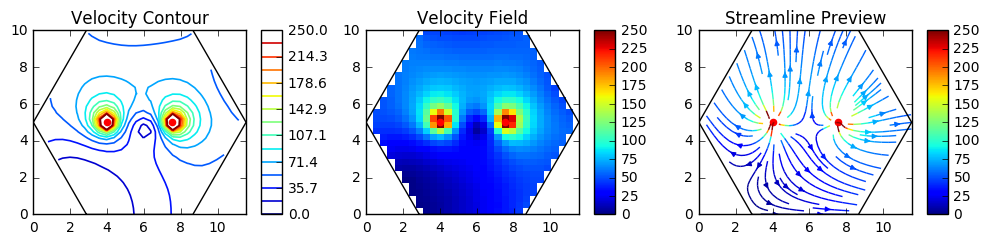

In [61]:
P,V_x,V_y=Method_embedded.FieldPlot(vmax=250)

## Fill-Grid Method

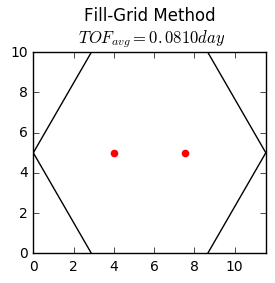

0.080980209724819674

In [4]:
import Lib.fillgrid as flg

Boundary_vert=[(2.88675,0), (0,5), (2.88675,10), (8.66025,10),(11.54701,5),(8.66025,0)]
Well_vert=[(4,5),(7.547,5)]
Qwell=[500,500]
flg.Fillgrid(Pts_e=Boundary_vert,Pts_w=Well_vert,Qw=Qwell,h=26.25,phi=0.2)